<a href="https://colab.research.google.com/github/BalkeesRekik/DS-4002-Project-1/blob/main/DS_4002_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 4002 Project 1
This juptyer notebook invesigates whether fake news articles tend to have more negative sentiment than real news and whether sentiment in fake news changed as the 2016 US presidential election approached. In order to analyze this research question, this project utilizes a dataset from [Kaggle](https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets). For sentiment analysis, the VADER python package was used.

# Preprocessing & Exploratory Data Analysis (MI2)

### 1.0 Preprocessing Data

In [1]:
# Installing pandas package
!pip install pandas

In [2]:
# Installing vaderSentiment package
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [3]:
# Installing kaggle package
!pip install kaggle

In [4]:
# Downloading the appropriate dataset from Kaggle
!kaggle datasets download -d emineyetm/fake-news-detection-datasets

Dataset URL: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets
License(s): unknown
 81% 33.0M/41.0M [00:00<00:00, 83.0MB/s]
100% 41.0M/41.0M [00:00<00:00, 80.8MB/s]


In [5]:
import zipfile
# This extracts the fake news dataset downloaded from kaggle
with zipfile.ZipFile('fake-news-detection-datasets.zip', 'r') as zip_ref:
    zip_ref.extractall('News_dataset')

In [6]:
import pandas as pd

# Load the datasets
fake_df = pd.read_csv('/content/News_dataset/News _dataset/Fake.csv')
true_df = pd.read_csv('/content/News_dataset/News _dataset/True.csv')

# Add the 'True' column to both datasets
fake_df['True'] = 0
true_df['True'] = 1

# Merge the datasets
merged_df = pd.concat([fake_df, true_df], ignore_index=True)

# Display the first few rows of the merged dataset
print(merged_df.head())

# Save the merged dataset to a new CSV file
merged_df.to_csv('/content/News_dataset/News _dataset/merged_news.csv', index=False)

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  True  
0  December 31, 2017     0  
1  December 31, 2017     0  
2  December 30, 2017     0  
3  December 29, 2017     0  
4  December 25, 2017     0  


In [7]:
import pandas as pd
import re

# Load the merged dataset
merged_df = pd.read_csv('/content/News_dataset/News _dataset/merged_news.csv')

# Rows with missing values
missing_values = merged_df.isnull().sum()
print("Rows with missing values:\n", missing_values)

Rows with missing values:
 title      0
text       0
subject    0
date       0
True       0
dtype: int64


In [8]:
# Rows with special characters (non-english)
def contains_special_chars(text):
  return bool(re.search(r'[^\x00-\x7F]+', text))

# Printing number of rows with special characters + 5 examples
special_chars_rows = merged_df[merged_df['text'].apply(contains_special_chars)]
print("\nNumber of rows with special characters:", len(special_chars_rows))
print("\nExamples of special characters:")
for index, row in special_chars_rows.head(5).iterrows(): #show first 5 examples only
  print(row['text'])


Number of rows with special characters: 10849

Examples of special characters:
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional inc

In [9]:
# Types of date/time values
print("\nDate/Time value types:\n", merged_df['date'].apply(lambda x: type(x)).value_counts())

# Convert 'date' to datetime objects
merged_df['date'] = merged_df['date'].str.strip()
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Restrict data to between January 1, 2016 and August 1, 2017
filtered_merged_df = merged_df[
   (merged_df['date'] >= '2016-01-01') & (merged_df['date'] < '2017-08-01')
]
print("\nShape of the DataFrame after filtering:", filtered_merged_df.shape)


Date/Time value types:
 date
<class 'str'>    44898
Name: count, dtype: int64

Shape of the DataFrame after filtering: (19450, 5)


In [10]:
#Count of True/False in 'True' column
print("\nCount of True/False in 'True' column:\n", filtered_merged_df['True'].value_counts())


Count of True/False in 'True' column:
 True
0    10565
1     8885
Name: count, dtype: int64


In [11]:
# Print basic stats on the numerical columns of dataframe
filtered_merged_df.describe()

,date,True
count,19450,19450.000000
mean,2016-10-16 04:30:58.303341824,0.456812
min,2016-01-01 00:00:00,0.000000
25%,2016-05-13 00:00:00,0.000000
50%,2016-11-01 00:00:00,0.000000
75%,2017-03-10 00:00:00,1.000000
max,2017-07-31 00:00:00,1.000000
std,NaN,0.498144


### 2.0 Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Count of Real and Fake News (Jan 2016 - Aug 2017)')

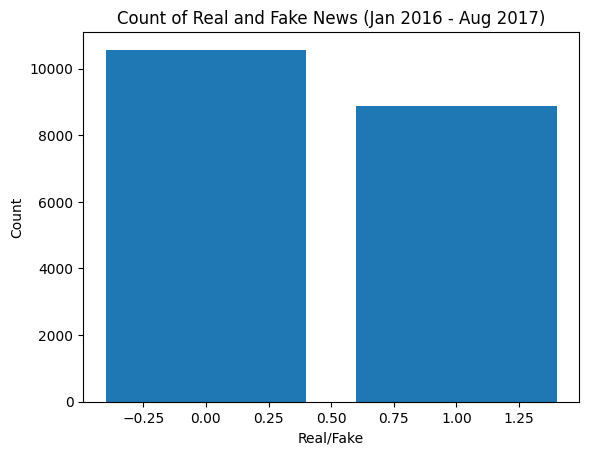

In [12]:
import matplotlib.pyplot as plt

# Count the number of true and false values in the 'True' column
value_counts = filtered_merged_df['True'].value_counts()

# Create a bar chart
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Real/Fake')
plt.ylabel('Count')
plt.title('Count of Real and Fake News (Jan 2016 - Aug 2017)')

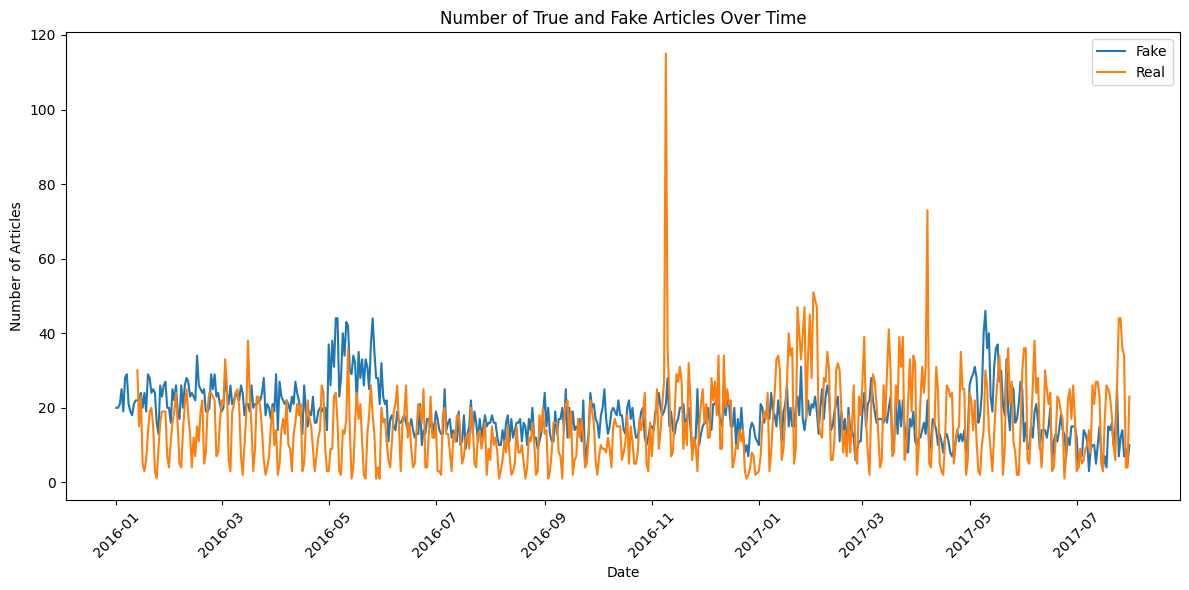

In [13]:
import matplotlib.pyplot as plt

# Group by date and 'True' column, count occurrences
date_counts = filtered_merged_df.groupby(['date', 'True']).size().reset_index(name='count')

# Plot the graph
plt.figure(figsize=(12, 6))
for label, df in date_counts.groupby('True'):
    plt.plot(df['date'], df['count'], label='Fake' if label == 0 else 'Real')

# Creating a time series graph for articles based on publishing date
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Number of True and Fake Articles Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

# python function to process text for world cloud
def preprocess_text(text):
    stop_words = set(stopwords.words('english')) # list of common english words irrelevant towards text processing
    text = text.lower()  # Convert to lowercase
    text = ''.join(char for char in text if char not in string.punctuation)  # Remove punctuation
    text = ''.join(char for char in text if not char.isdigit())  # Remove digits
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# creating new column in dataframe for the processed text
filtered_merged_df['processed_text'] = filtered_merged_df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-14-6618f5adbf9f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df['processed_text'] = filtered_merged_df['text'].apply(preprocess_text)


In [15]:
from collections import Counter
real_words = filtered_merged_df[filtered_merged_df['True'] == 1]['processed_text'].explode()
fake_words = filtered_merged_df[filtered_merged_df['True'] == 0]['processed_text'].explode()

# counting the 50 most frequent word in real/fake news
real_word_freq = Counter(real_words)
fake_word_freq = Counter(fake_words)
real_top_words = real_word_freq.most_common(50)
fake_top_words = fake_word_freq.most_common(50)

# printing 50 most common words
print(real_top_words)
print(fake_top_words)

[('said', 43331), ('trump', 30155), ('us', 24667), ('would', 16357), ('president', 12793), ('republican', 12343), ('reuters', 11449), ('house', 11063), ('trump’s', 9476), ('new', 9079), ('states', 8558), ('state', 8520), ('washington', 7726), ('clinton', 7376), ('campaign', 7310), ('also', 7130), ('united', 6990), ('donald', 6871), ('white', 6707), ('could', 6619), ('obama', 6268), ('presidential', 6220), ('senate', 6131), ('election', 6018), ('former', 6016), ('democratic', 5770), ('told', 5753), ('people', 5419), ('one', 5201), ('last', 5198), ('administration', 4843), ('republicans', 4771), ('percent', 4724), ('court', 4658), ('government', 4536), ('federal', 4351), ('two', 4298), ('law', 4174), ('year', 4151), ('national', 4085), ('first', 4078), ('bill', 4070), ('security', 4020), ('committee', 3841), ('officials', 3764), ('department', 3712), ('including', 3680), ('tuesday', 3664), ('senator', 3647), ('office', 3572)]
[('trump', 50034), ('people', 14369), ('said', 13267), ('would

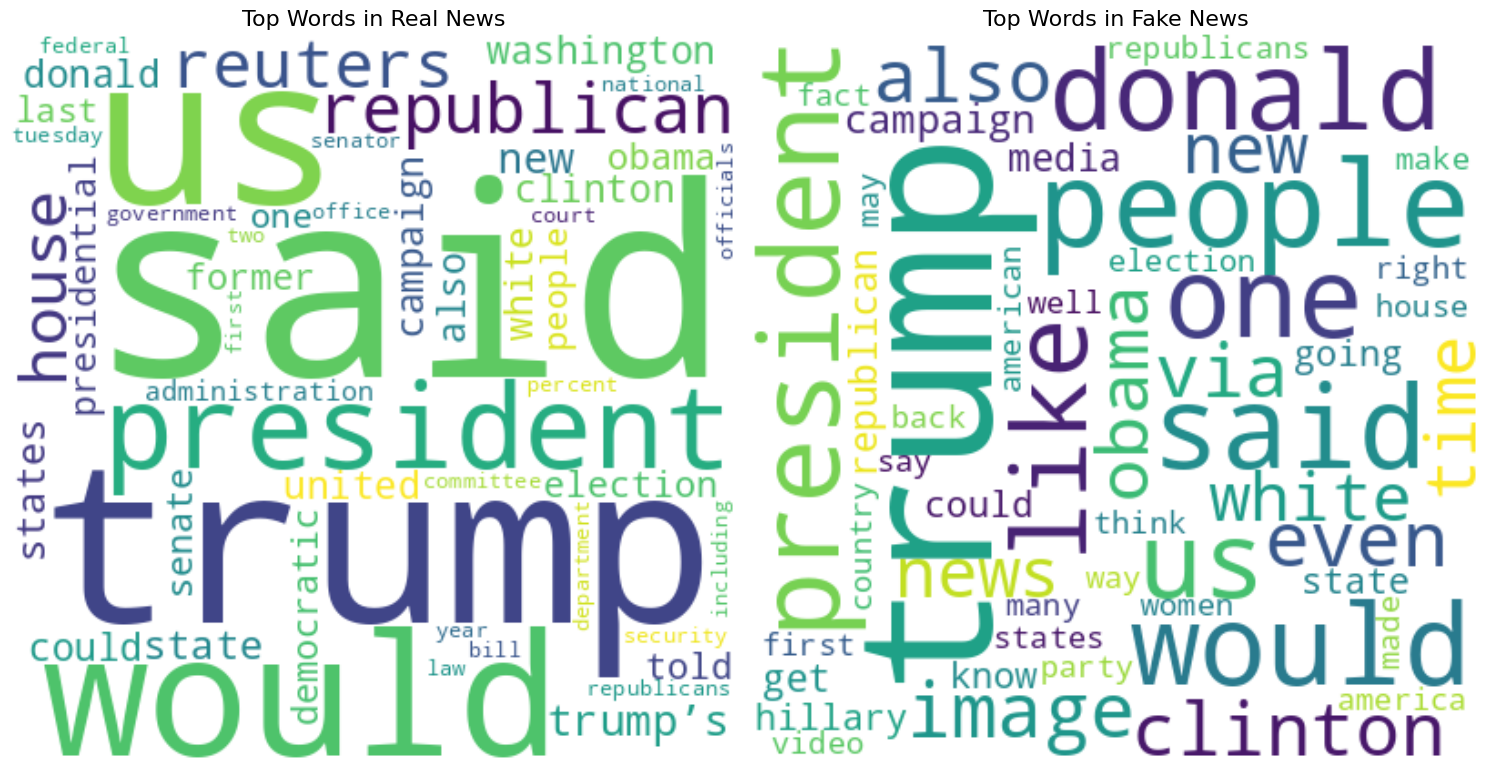

In [16]:
# Convert to dictionary for visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
real_top_dict = dict(real_top_words)
fake_top_dict = dict(fake_top_words)

# Plot word clouds
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
wordcloud_real = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(real_top_dict)
wordcloud_fake = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(fake_top_dict)

ax[0].imshow(wordcloud_real, interpolation='bilinear')
ax[0].set_title("Top Words in Real News", fontsize=16)
ax[0].axis('off')

ax[1].imshow(wordcloud_fake, interpolation='bilinear')
ax[1].set_title("Top Words in Fake News", fontsize=16)
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Sentiment Analysis (MI3)

### 1.0 Text Preprocessing

In [17]:
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

with zipfile.ZipFile('fake-news-detection-datasets.zip', 'r') as zip_ref:
    zip_ref.extractall('News_dataset')

# Load the datasets
fake_df = pd.read_csv('/content/News_dataset/News _dataset/Fake.csv')
true_df = pd.read_csv('/content/News_dataset/News _dataset/True.csv')

# Add the 'True' column to both datasets
fake_df['True'] = 0
true_df['True'] = 1

# Merge the datasets
merged_df = pd.concat([fake_df, true_df], ignore_index=True)

# Convert 'date' to datetime objects
merged_df['date'] = merged_df['date'].str.strip()
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Restrict data to January 1, 2016 and beyond
filtered_df = merged_df[
    (merged_df['date'] >= '2016-01-01') & (merged_df['date'] < '2017-03-01')
]
print("\nShape of the DataFrame after filtering:", filtered_merged_df.shape)

# Remove links & special characters (not much more is necessary because VADER works well w/ natural language)
filtered_df['text'] = filtered_df['text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x, flags=re.MULTILINE))



Shape of the DataFrame after filtering: (19450, 6)


<ipython-input-17-5c3bc99c60ef>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['text'] = filtered_df['text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x, flags=re.MULTILINE))


### 2.0 Vader

In [18]:
# This code segment performs the general sentiment analysis - cleaning text while preserving most of its original data.

# Preprocess text: remove URLs and numbers, which introduce noise into the sentiment analysis
def clean_text(text):
    text = str(text).lower().strip()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

filtered_df['clean_text'] = filtered_df['text'].apply(clean_text)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
filtered_df['sentiment'] = filtered_df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


<ipython-input-18-63d52b3cb78c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['clean_text'] = filtered_df['text'].apply(clean_text)
<ipython-input-18-63d52b3cb78c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


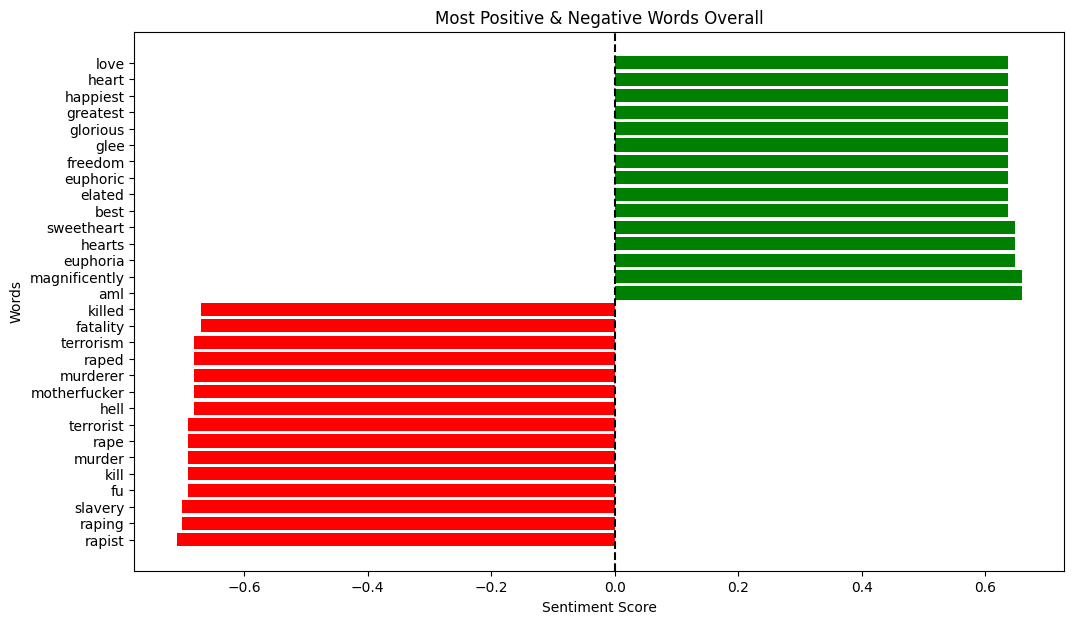

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import string

# Ensure 'clean_text' is string type
filtered_df['clean_text'] = filtered_df['clean_text'].astype(str)

# Tokenize text into words
filtered_df['words'] = filtered_df['clean_text'].str.split()

# Explode the list of words so each row contains a single word
word_sentiment_df = filtered_df.explode('words')

# Create a normalized word version: lowercase and strip punctuation
word_sentiment_df['clean_word'] = word_sentiment_df['words'].apply(
    lambda w: str(w).lower().strip(string.punctuation)
)

# Calculate the sentiment for each word individually using VADER on the normalized word
word_sentiment_df['word_sentiment'] = word_sentiment_df['clean_word'].apply(
    lambda w: sia.polarity_scores(w)['compound']
)

# Define number of top words to include
num_words = 15  # Number of most positive/negative words

# Get the top positive and negative words overall (without separating by news type)
top_positive_words = word_sentiment_df.groupby("clean_word")["word_sentiment"].mean().nlargest(num_words)
top_negative_words = word_sentiment_df.groupby("clean_word")["word_sentiment"].mean().nsmallest(num_words)

# Combine for a single plot
top_words = pd.concat([top_negative_words, top_positive_words])

# X-axis positions
x_values = np.arange(len(top_words))

# Plot single bar chart
plt.figure(figsize=(12, 7))
plt.barh(top_words.index, top_words.values, color=['red']*num_words + ['green']*num_words)

# Formatting
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("Sentiment Score")
plt.ylabel("Words")
plt.title("Most Positive & Negative Words Overall")
plt.show()

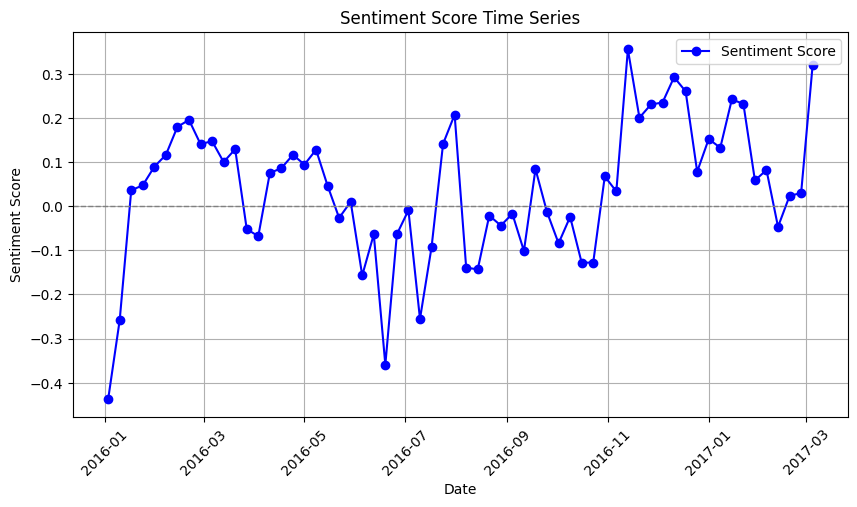

In [20]:
# Creating Time-Series graph of Sentiment Score
import matplotlib.pyplot as plt

# Sort by Date
filtered_df = filtered_df.sort_values(by='date')
# selecting numeric columns only
filtered_df_numeric = filtered_df.select_dtypes(include=['number', 'datetime64'])
#organzing sentiment score by week
filtered_df_week = filtered_df_numeric.resample('W', on='date').mean()

# Plotting the time-seris graph
plt.figure(figsize=(10, 5))
plt.plot(filtered_df_week.index, filtered_df_week['sentiment'], marker='o', linestyle='-', color='b', label='Sentiment Score')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Neutral sentiment line
plt.xlabel('Date')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Time Series')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


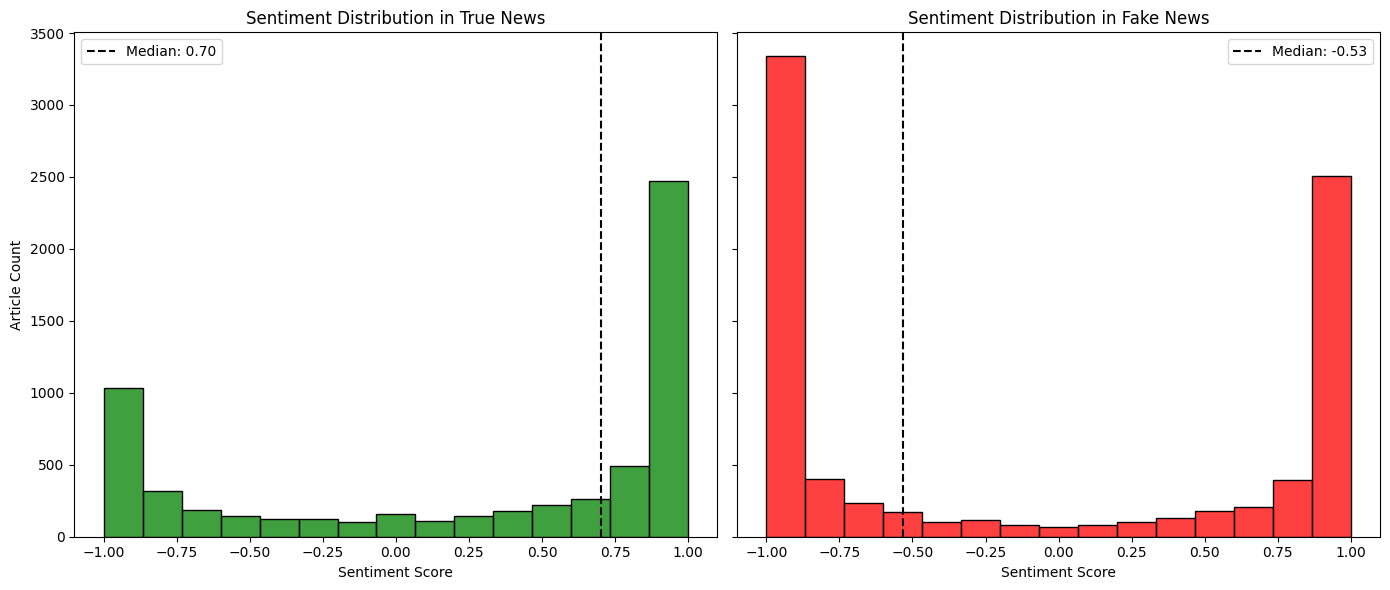

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average and median sentiment scores
true_median_sentiment = filtered_df[filtered_df['True'] == 1]['sentiment'].median()
fake_median_sentiment = filtered_df[filtered_df['True'] == 0]['sentiment'].median()

# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Histogram for True News
sns.histplot(filtered_df[filtered_df['True'] == 1]['sentiment'], bins=15, color='green', kde=False, ax=ax[0])
ax[0].set_title("Sentiment Distribution in True News")
ax[0].set_xlabel("Sentiment Score")
ax[0].set_ylabel("Article Count")
ax[0].axvline(true_median_sentiment, color="black", linestyle="--", linewidth=1.5, label=f'Median: {true_median_sentiment:.2f}')
ax[0].legend()

# Histogram for Fake News
sns.histplot(filtered_df[filtered_df['True'] == 0]['sentiment'], bins=15, color='red', kde=False, ax=ax[1])
ax[1].set_title("Sentiment Distribution in Fake News")
ax[1].set_xlabel("Sentiment Score")
ax[1].axvline(fake_median_sentiment, color="black", linestyle="--", linewidth=1.5, label=f'Median: {fake_median_sentiment:.2f}')
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
from scipy.stats import mannwhitneyu
import numpy as np

# Compute average sentiment for Fake and True news overall
fake_sentiment = filtered_df[filtered_df['True'] == 0]['sentiment']
true_sentiment = filtered_df[filtered_df['True'] == 1]['sentiment']

# Run Mann-Whitney U test
u_stat, p_value = mannwhitneyu(fake_sentiment, true_sentiment, alternative='two-sided')

# Compute Rank-Biserial Correlation (r)
n1, n2 = len(fake_sentiment), len(true_sentiment)
rbc = 1 - (2 * u_stat) / (n1 * n2)

# Print results
print(f"Mann-Whitney U Test: U-Statistic = {u_stat}, P-Value = {p_value:.4f}")
print(f"Rank-Biserial Correlation (r): {rbc:.4f}")

Mann-Whitney U Test: U-Statistic = 18521560.5, P-Value = 0.0000
Rank-Biserial Correlation (r): 0.2472


In [23]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

# Define pre-election (July 1, 2016 - Nov 7, 2016) and post-election (Nov 9, 2016 - Mar 1, 2017) periods
pre_election_period = filtered_df[(filtered_df['date'] >= '2016-07-01') & (filtered_df['date'] <= '2016-11-07')]
post_election_period = filtered_df[(filtered_df['date'] >= '2016-11-09') & (filtered_df['date'] <= '2017-03-01')]

# Compute sentiment scores for Fake and True news in pre-election and post-election periods
pre_election_fake = pre_election_period[pre_election_period['True'] == 0]['sentiment']
pre_election_true = pre_election_period[pre_election_period['True'] == 1]['sentiment']

post_election_fake = post_election_period[post_election_period['True'] == 0]['sentiment']
post_election_true = post_election_period[post_election_period['True'] == 1]['sentiment']

# Mann-Whitney U test for Fake News
u_stat_fake, p_value_fake = mannwhitneyu(pre_election_fake, post_election_fake, alternative='two-sided')

# Mann-Whitney U test for True News
u_stat_true, p_value_true = mannwhitneyu(pre_election_true, post_election_true, alternative='two-sided')

# Compute Rank-Biserial Correlation (r)
n1_fake, n2_fake = len(pre_election_fake), len(post_election_fake)
rbc_fake = 1 - (2 * u_stat_fake) / (n1_fake * n2_fake)

n1_true, n2_true = len(pre_election_true), len(post_election_true)
rbc_true = 1 - (2 * u_stat_true) / (n1_true * n2_true)

# Compute median sentiment scores
median_pre_fake = pre_election_fake.median()
median_post_fake = post_election_fake.median()

median_pre_true = pre_election_true.median()
median_post_true = post_election_true.median()

# Determine change in sentiment
change_fake = median_post_fake - median_pre_fake
change_true = median_post_true - median_pre_true

# Print Results
# Print results for Fake News (USED FOR HYPOTHESIS)
print("==== FAKE NEWS SENTIMENT ====")
print(f"Pre-Election Median: {median_pre_fake:.4f}, Post-Election Median: {median_post_fake:.4f}")
print(f"Change in Sentiment: {change_fake:.4f}")
print(f"Mann-Whitney U Test: U-Statistic = {u_stat_fake}, P-Value = {p_value_fake:.4f}")
print(f"Rank-Biserial Correlation (r): {rbc_fake:.4f}")

if rbc_fake > 0:
    print("Fake News Sentiment increased post-election.")
else:
    print("Fake News Sentiment decreased post-election.")

# Print results for True News (not used for hypothesis)
print("\n==== TRUE NEWS SENTIMENT ====")
print(f"Pre-Election Median: {median_pre_true:.4f}, Post-Election Median: {median_post_true:.4f}")
print(f"Change in Sentiment: {change_true:.4f}")
print(f"Mann-Whitney U Test: U-Statistic = {u_stat_true}, P-Value = {p_value_true:.4f}")
print(f"Rank-Biserial Correlation (r): {rbc_true:.4f}")

if rbc_true > 0:
    print("True News Sentiment increased post-election.")
else:
    print("True News Sentiment decreased post-election.")

==== FAKE NEWS SENTIMENT ====
Pre-Election Median: -0.7265, Post-Election Median: -0.5222
Change in Sentiment: 0.2043
Mann-Whitney U Test: U-Statistic = 1825843.0, P-Value = 0.0010
Rank-Biserial Correlation (r): 0.0604
Fake News Sentiment increased post-election.

==== TRUE NEWS SENTIMENT ====
Pre-Election Median: 0.5106, Post-Election Median: 0.7964
Change in Sentiment: 0.2858
Mann-Whitney U Test: U-Statistic = 1367089.5, P-Value = 0.0000
Rank-Biserial Correlation (r): 0.1374
True News Sentiment increased post-election.


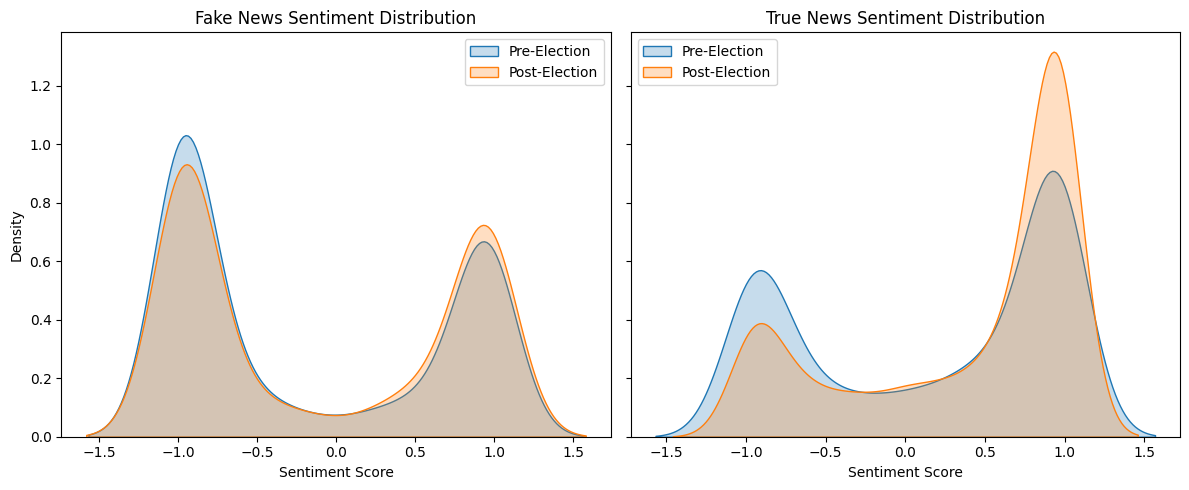

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for Fake and True news sentiment distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Fake News Sentiment Distribution
sns.kdeplot(pre_election_fake, fill=True, label="Pre-Election", ax=axes[0])
sns.kdeplot(post_election_fake, fill=True, label="Post-Election", ax=axes[0])
axes[0].set_title("Fake News Sentiment Distribution")
axes[0].set_xlabel("Sentiment Score")
axes[0].set_ylabel("Density")
axes[0].legend()

# True News Sentiment Distribution
sns.kdeplot(pre_election_true, fill=True, label="Pre-Election", ax=axes[1])
sns.kdeplot(post_election_true, fill=True, label="Post-Election", ax=axes[1])
axes[1].set_title("True News Sentiment Distribution")
axes[1].set_xlabel("Sentiment Score")
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

## 3.0 Code for Data Appendix

In [26]:
# converting final analyzed dataframe into csv
import csv
filtered_df["words"] = filtered_df["words"].apply(lambda x: str(x).replace("\n", " "))
filtered_df.to_csv('/content/News_dataset/News _dataset/filtered_news.csv', index=False, quoting=csv.QUOTE_ALL)

In [27]:
# verifying the exported csv has the correct dimensions
downloaded_csv = pd.read_csv('/content/News_dataset/News _dataset/filtered_news.csv')
print(downloaded_csv.shape)

(14181, 8)


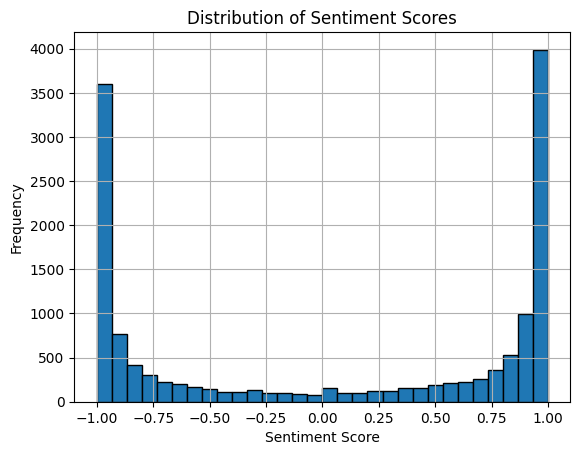

In [28]:
# creating histogram for sentiment column
import matplotlib.pyplot as plt

sentiment_bins = filtered_df["sentiment"].hist(bins=30, edgecolor='black')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

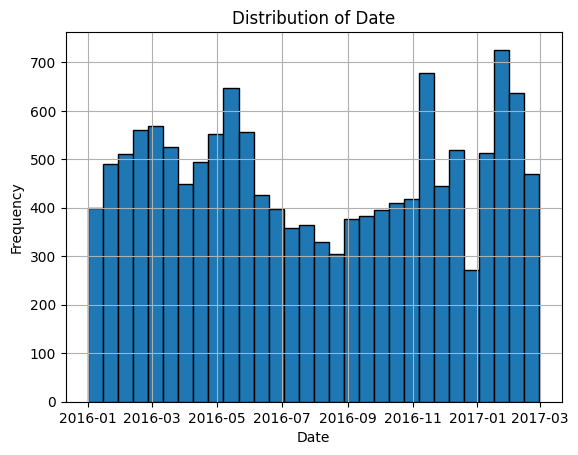

In [29]:
# creating histogram for date column

date_counts_bins = filtered_df["date"].hist(bins=30, edgecolor='black')
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Distribution of Date")
plt.show()

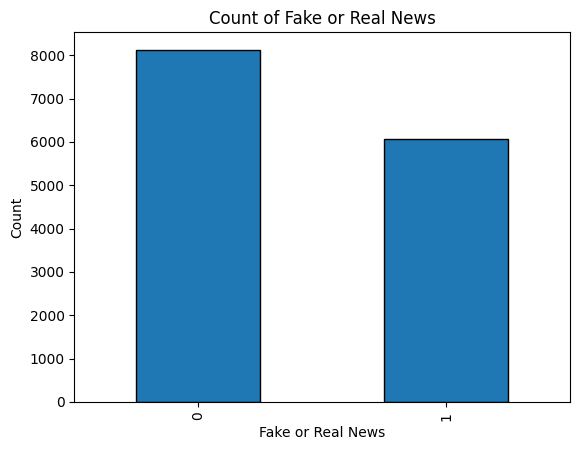

In [30]:
# creating histogram for True column

true_count = filtered_df["True"].value_counts()
true_count.plot(kind='bar', edgecolor='black')
plt.xlabel("Fake or Real News")
plt.ylabel("Count")
plt.title("Count of Fake or Real News")
plt.show()
#

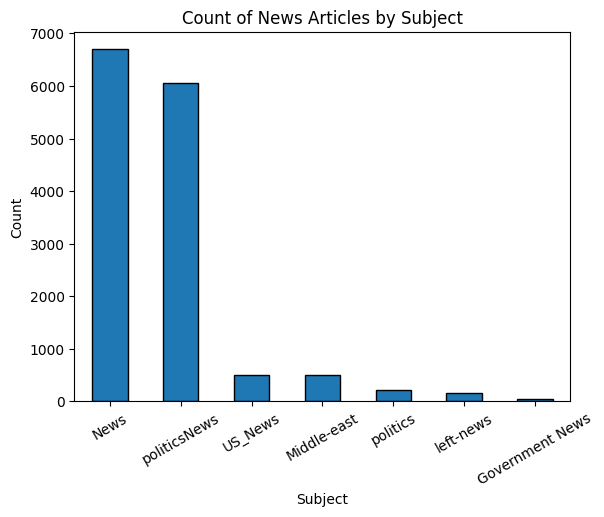

In [31]:
# creating frequency graph for subject column

subject_counts = filtered_df["subject"].value_counts()
subject_counts.plot(kind='bar', edgecolor='black')
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation = 30) # Rotate x-axis labels for better readability
plt.title("Count of News Articles by Subject")
plt.show()


In [32]:
 # creating a frequency table for the subject column
subject_counts = filtered_df["subject"].value_counts()
subject_counts_df = pd.DataFrame(subject_counts)
subject_counts_df.reset_index(inplace=True)
subject_counts_df.columns = ["Subject", "Count"]
print(subject_counts_df)

           Subject  Count
0             News   6694
1     politicsNews   6057
2          US_News    502
3      Middle-east    497
4         politics    225
5        left-news    159
6  Government News     47
